# DNN 구축과 훈련 실습

## 라이브러리 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

import os

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


## 하이퍼 파라미터

In [3]:
learning_rate = 0.001
training_epochs = 10
batch_size = 128
n_class = 10

## MNIST 데이터셋

In [4]:
## MNIST Dataset 
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Fashion MNIST Dataset 
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터셋 불러오기

In [5]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

## 연습1: 데이터셋 불러오기

In [6]:
## train_images, train_labels의 type 확인
type(train_images),type(train_labels)


(numpy.ndarray, numpy.ndarray)

In [7]:
## train_images, train_labels의 shape 확인
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
## test_images, test_labels의 shape 확인
test_images.shape,  test_labels.shape

((10000, 28, 28), (10000,))

In [9]:
## training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [10]:
## test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [11]:
## train dataset, test dataset의 개수 저장
n_train = train_images.shape[0]
n_test = test_images.shape[0]
print('train data 수: ', n_train)
print(' test data 수: ', n_test)

train data 수:  60000
 test data 수:  10000


In [12]:
print(train_labels[2])

4


In [13]:
#print(train_images[2])

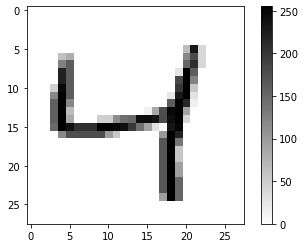

In [14]:
## train_images의 0번 image 화면에 출력
plt.figure()
plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

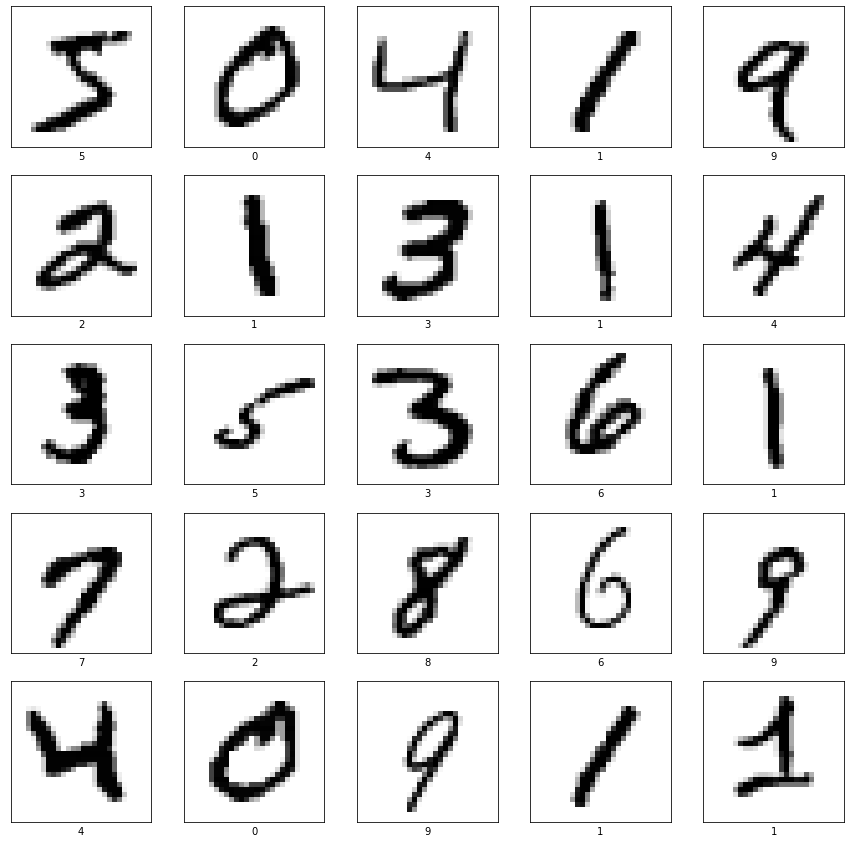

In [15]:
## 25개의 train image와 label 화면에 출력
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
print('<nomalizing pixel values>')
print('before: ', train_images[0,13,12:17])
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
print('after:  ', train_images[0,13,12:17])
print()

<nomalizing pixel values>
before:  [ 35 241 225 160 108]
after:   [0.13725491 0.94509804 0.88235295 0.627451   0.42352942]



## 연습2: 원핫인코딩

In [17]:
## one-hot encodin을 완성하라.
## to_categorical(레이블, n_class)을 사용  => 
##  원핫 코딩 categorical_crossentropy로 매치하는 것 기억  (정수: sparse_categorial_crossentropy
print('<one-hot encoding>')
print('before: ', train_labels[:5])
#  to do
train_labels=to_categorical(train_labels,n_class)
test_labels=to_categorical(test_labels,n_class)

#  to do
print('after:  ', train_labels[:5])

<one-hot encoding>
before:  [5 0 4 1 9]
after:   [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 연습3: 데이터셋 구성

In [18]:
## dataset 구성
# from_tensor_slices, shuffe, batch, repeat(epoch)를 사용해보라. 
# 참조 
#1. repeat(step_n) : 원하는 epoch 수를 넣을 수 있다. 아무런 파라미터를 주지 않는다면 iteration이 무제한으로 돌아간다.
#2. shuffle(1000) : 한번 epoch이 돌고나서 랜덤하게 섞을 것인지 정한다.
#  to do
train_dataset=tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(buffer_size=100000).batch(batch_size).repeat()
test_dataset=tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(batch_size)
#  to do

## 신경망으로 구현한 로지스틱 회귀 모델

## 연습 4: 신경망 로지스틱 회귀 모델 구축

In [19]:
# 힌트: Dense, 클래스 10개, softmax를 사용해라.
def create_lr_model():
#  to do
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #28x28 ->784
    model.add(keras.layers.Dense(10,activation='softmax'))
#  to do
    return model


In [20]:
lr_model = create_lr_model()
lr_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 연습 5. 모델 컴파일

## 모델 컴파일 (최적화와 손실함수) 

In [21]:
# 다음을 사용해 컴파일을 완성하라
# keras.optimizers.Adam, learning_rate, 손실함수는 categorical_crossentropy, 성과척도는 accaury로 시도해보라
# 최적화(optimizer), 손실함수(loss), 성과척도(metrics) 정의하는 것

lr_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='categorical_crossentropy',
                metrics=['accuracy'])
#  to do
#  to do

## 훈련(학습)

In [22]:
steps_per_epoch = n_train//batch_size  # train sample 한 에폭에 배치 몇번!  #model.fit()에서 사용한다.
validation_steps = n_test//batch_size  # 한 test에 배치 몇번
print('number of steps per epoch: ', steps_per_epoch)
print('number of steps per validation: ', validation_steps) 

number of steps per epoch:  468
number of steps per validation:  78


In [23]:
## traing 전에 loss 및 validation accuracy 확인
# test_dataset을 사용해 보라
lr_model.evaluate(test_dataset, steps=validation_steps)


78/78 [==============================] - 0s 766us/step - loss: 2.3941 - accuracy: 0.0865


[2.409384250640869, 0.08443509787321091]

## 연습 6. 모델 학습 

In [24]:
# 다음과 lr_model.fit() 함수를 이용해 아래 학습함수를 완성하라
# 힌트:  train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
# validation_data=test_dataset, validation_steps=validation_steps
lr_model.fit(train_dataset,epochs=training_epochs,steps_per_epoch=steps_per_epoch,
            validation_data=test_dataset, validation_steps=validation_steps)
#  to do
#  to do

Epoch 1/10
468/468 [==============================] - 2s 3ms/step - loss: 0.6831 - accuracy: 0.8303 - val_loss: 0.3832 - val_accuracy: 0.8996
Epoch 2/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.9023 - val_loss: 0.3199 - val_accuracy: 0.9121
Epoch 3/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.9121 - val_loss: 0.2965 - val_accuracy: 0.9167
Epoch 4/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.9175 - val_loss: 0.2862 - val_accuracy: 0.9210
Epoch 5/10
468/468 [==============================] - 1s 1ms/step - loss: 0.2874 - accuracy: 0.9196 - val_loss: 0.2778 - val_accuracy: 0.9223
Epoch 6/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.9218 - val_loss: 0.2761 - val_accuracy: 0.9234
Epoch 7/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2736 - accuracy: 0.9230 - val_loss: 0.2712 - val_accuracy: 0.9250
Epoch 

In [25]:
## traing 후에 loss 및 validation accuracy 확인: 훈련이전과 비교
# test_dataset을 사용해 보라
lr_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 727us/step - loss: 0.2682 - accuracy: 0.9258


[0.26816266775131226, 0.92578125]

## 학습 결과 확인

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)  # 손글씨 그림 그리기

    predicted_label = np.argmax(predictions_array)  # 레이블 예측
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array) # 레이블 예측
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

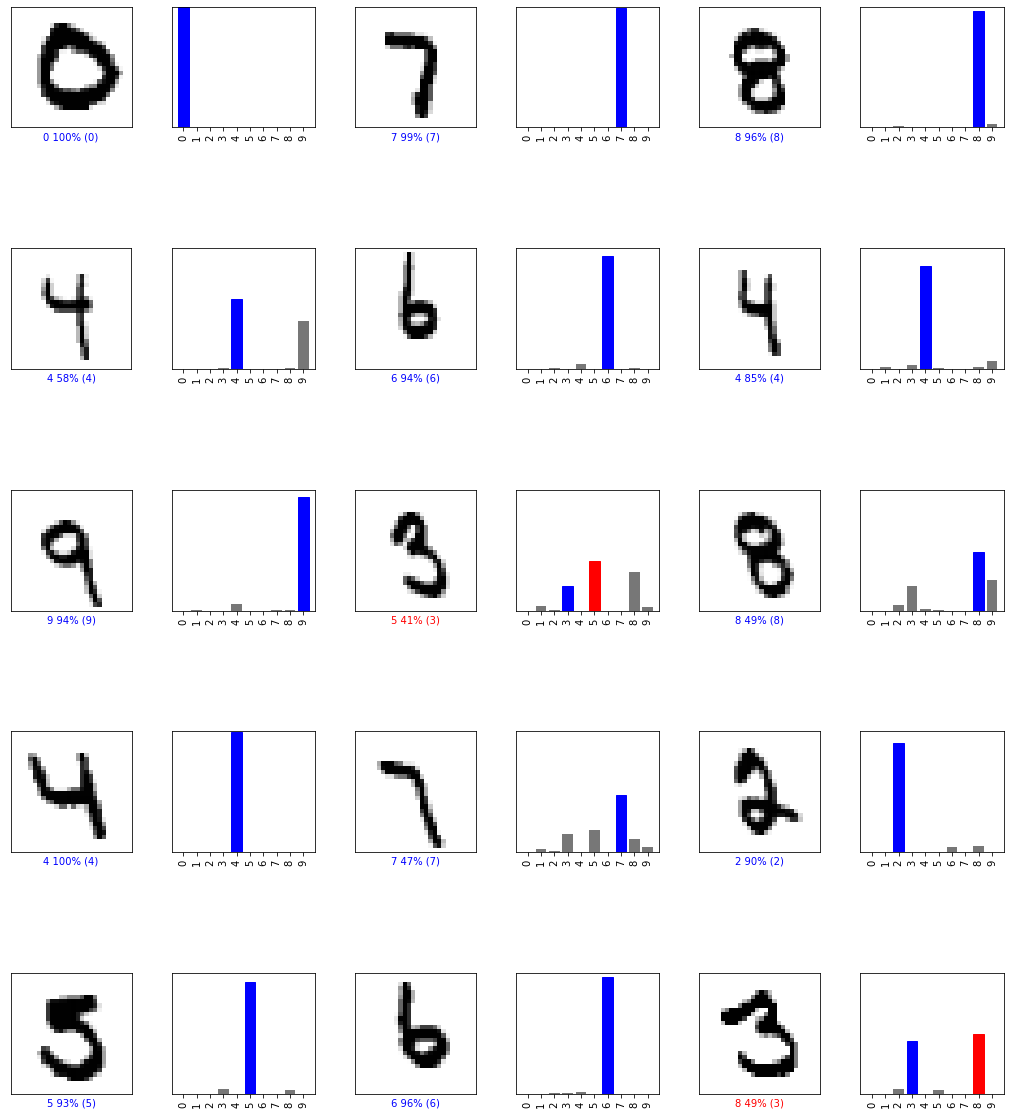

In [27]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = lr_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())  # images.numpy()를 imshow로 그린다.
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

In [28]:
 predictions = lr_model(images, training=False)

In [29]:
 predictions = lr_model.predict(images)

In [30]:
predictions[0]

array([9.99870420e-01, 3.81833237e-14, 1.25597828e-04, 3.17256792e-07,
       1.06307878e-14, 1.22374772e-07, 1.11101990e-07, 1.05567756e-10,
       3.32068589e-06, 1.62167831e-11], dtype=float32)

## 3층 DNN을 구축해보자

## 연습 7: 3층 DNN 구축

In [31]:
# 다음의 3층 DNN을 완성하라.
# input_shape=(28,28)를 사용하고
# 은닉층의 유닛을 256, 128로 하고 마지막 전결합 출력 유닛을 10로 하는 3층 신경망을 완성하라. 
# 은닉층의 활성화 함수는 relu 전결합층의 활성화함수는 softmax를 사용하라.
def create_mlp_model():
#  to do
#  to do
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #28x28 ->784
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(10,activation='softmax'))
#  to do
#  to do
    return model

In [32]:
mlp_model = create_mlp_model()
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [33]:
## 모델 컴파일
mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [34]:
## traing 전에 loss 및 validation accuracy 확인
mlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 1ms/step - loss: 2.3095 - accuracy: 0.1486


[2.3031327724456787, 0.15184295177459717]

In [35]:
## 훈련
history = mlp_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 2s 2ms/step - loss: 0.2717 - accuracy: 0.9220 - val_loss: 0.1394 - val_accuracy: 0.9578
Epoch 2/10
468/468 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9682 - val_loss: 0.0943 - val_accuracy: 0.9700
Epoch 3/10
468/468 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 0.0788 - val_accuracy: 0.9757
Epoch 4/10
468/468 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0801 - val_accuracy: 0.9765
Epoch 5/10
468/468 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 6/10
468/468 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0700 - val_accuracy: 0.9795
Epoch 7/10
468/468 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0841 - val_accuracy: 0.9753
Epoch 

In [36]:
## traing 후 loss 및 validation accuracy 확인
mlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9792


[0.08114903420209885, 0.9791666865348816]

# 학습결과 확인

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

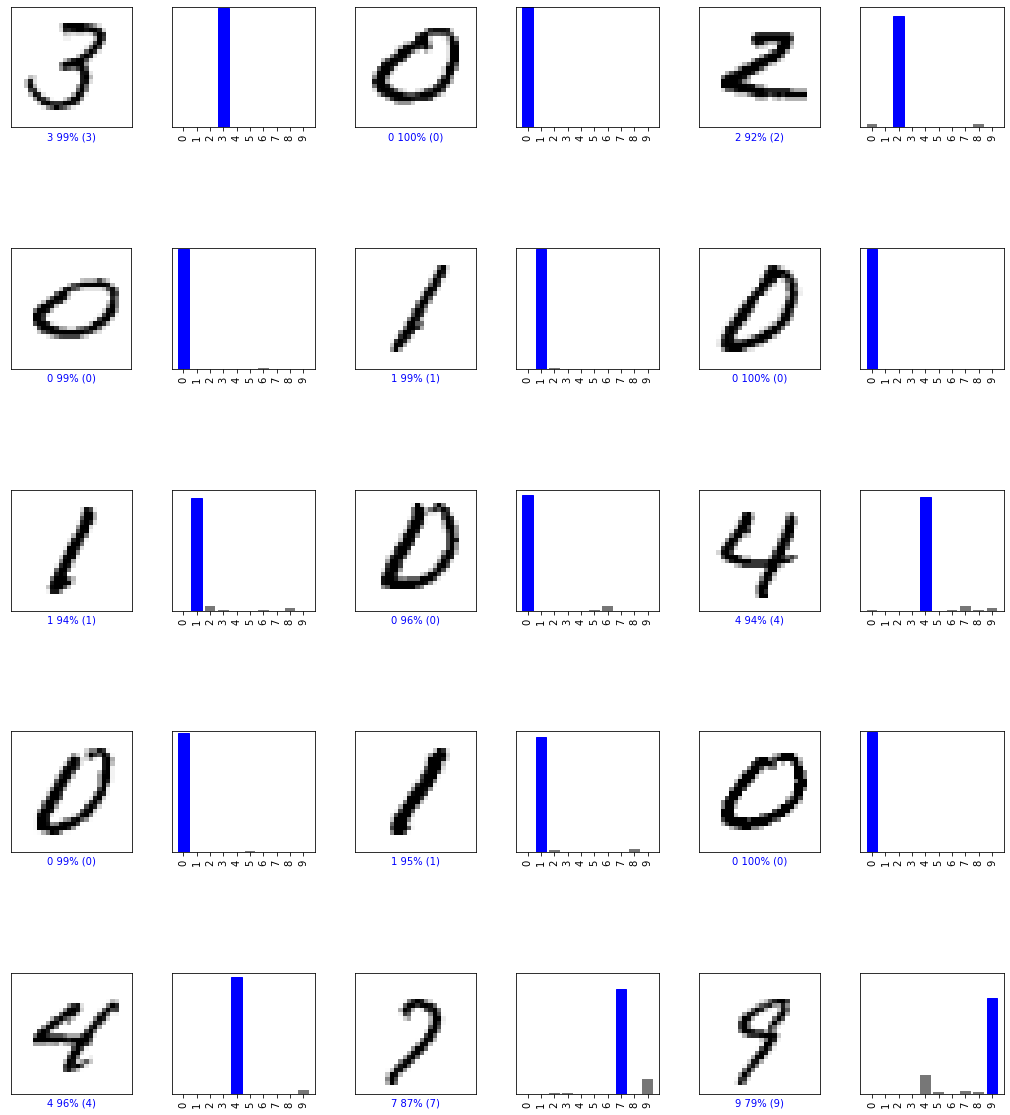

In [38]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = lr_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## 이제 5층 DNN을 구축해보자

## 연습 8:  5층 DNN 구축

In [39]:
# 다음의 5층 DNN을 완성하라.
# input_shape=(28,28)를 사용하고
# 2개 은닉층의 유닛을 각각 256, 128로 하고 마지막 전결합 출력 유닛을 10로 하는 5층 신경망을 완성하라. 
# 은닉층의 활성화 함수는 relu 전결합층의 활성화함수는 softmax를 사용하라.

def create_dmlp_model():
#  to do
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #28x28 ->784
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(10,activation='softmax'))
#  to do
    return model

In [40]:
dmlp_model = create_dmlp_model()
dmlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [41]:
## 모델 컴파일
dmlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [42]:
## traing 전에 loss 및 validation accuracy 확인
dmlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 1ms/step - loss: 2.3221 - accuracy: 0.0805


[2.3219716548919678, 0.09204727411270142]

In [43]:
## 훈련
history = dmlp_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 2s 3ms/step - loss: 0.2620 - accuracy: 0.9217 - val_loss: 0.1109 - val_accuracy: 0.9658
Epoch 2/10
468/468 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.9722 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 3/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0697 - val_accuracy: 0.9788
Epoch 4/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0702 - val_accuracy: 0.9800
Epoch 5/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0392 - accuracy: 0.9871 - val_loss: 0.1140 - val_accuracy: 0.9680
Epoch 6/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0306 - accuracy: 0.9895 - val_loss: 0.0930 - val_accuracy: 0.9721
Epoch 7/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.0688 - val_accuracy: 0.9807
Epoch 

In [44]:
## traing 후에 loss 및 validation accuracy 확인
dmlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9759


[0.1053905263543129, 0.9758613705635071]

## 드롭 아웃 (Drop-out)을 추가해보자

## 연습 9: 드롭아웃 추가

In [54]:
# 5층 DNN의 은닉층의 출력 다음 단계에 Dropout을 추가하라. kera.layers.Dropout(drop_rate)
drop_rate = 0.2 # 드롭되는 비율

def create_do_model():
#  to do
#  to do
    
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #28x28 ->784
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(10,activation='softmax'))
#  to do
#  to do
    return model

In [55]:
do_model = create_do_model()
do_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [56]:
## 모델 컴파일
do_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [57]:
## traing 전에 loss 및 validation accuracy 확인
do_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 1ms/step - loss: 2.3165 - accuracy: 0.1035


[2.315335512161255, 0.10446714609861374]

In [58]:
## 훈련
history = do_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 3s 5ms/step - loss: 0.3775 - accuracy: 0.8855 - val_loss: 0.1228 - val_accuracy: 0.9617
Epoch 2/10
468/468 [==============================] - 2s 5ms/step - loss: 0.1500 - accuracy: 0.9556 - val_loss: 0.1041 - val_accuracy: 0.9696
Epoch 3/10
468/468 [==============================] - 2s 5ms/step - loss: 0.1122 - accuracy: 0.9668 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 4/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0934 - accuracy: 0.9724 - val_loss: 0.0729 - val_accuracy: 0.9793
Epoch 5/10
468/468 [==============================] - 3s 5ms/step - loss: 0.0791 - accuracy: 0.9764 - val_loss: 0.0783 - val_accuracy: 0.9777
Epoch 6/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.9784 - val_loss: 0.0749 - val_accuracy: 0.9787
Epoch 7/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0621 - accuracy: 0.9815 - val_loss: 0.0654 - val_accuracy: 0.9812
Epoch 

In [59]:
## traing 후에 loss 및 validation accuracy 확인
do_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9826


[0.06334049254655838, 0.9825721383094788]

## 가중치 감쇠: L2 규제화 (Weight Decay: L2 Regulrarization)를 적용해보자

## 연습 10: 가중치 감쇠 규제화

In [66]:
# 다음을 이용해서 5층 DNN의 규제화를 완성하라. (Dropout 대신 규제화를 사용한다.)
# kernel_regularizer=keras.regularizers.l2(reg_weight),
# bias_regularizer=keras.regularizers.l2(reg_weight)
reg_weight = 0.00002

def create_l2r_model():
    
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #28x28 ->784
    model.add(keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(reg_weight),
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(reg_weight),
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(reg_weight),
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(reg_weight),
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(10,activation='softmax',kernel_regularizer=keras.regularizers.l2(reg_weight),
              bias_regularizer=keras.regularizers.l2(reg_weight)))

    
    return model

In [67]:
l2r_model = create_l2r_model()
l2r_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [68]:
## 모델 컴파일
l2r_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [69]:
## traing 전에 loss 및 validation accuracy 확인
l2r_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 2ms/step - loss: 2.3586 - accuracy: 0.0680


[2.362189292907715, 0.07131410390138626]

In [70]:
## 훈련
history = l2r_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 3s 4ms/step - loss: 0.2851 - accuracy: 0.9206 - val_loss: 0.1367 - val_accuracy: 0.9634
Epoch 2/10
468/468 [==============================] - 2s 5ms/step - loss: 0.1182 - accuracy: 0.9693 - val_loss: 0.1187 - val_accuracy: 0.9692
Epoch 3/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0843 - accuracy: 0.9797 - val_loss: 0.1025 - val_accuracy: 0.9733
Epoch 4/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0727 - accuracy: 0.9835 - val_loss: 0.1027 - val_accuracy: 0.9743
Epoch 5/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0621 - accuracy: 0.9867 - val_loss: 0.0954 - val_accuracy: 0.9799
Epoch 6/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0557 - accuracy: 0.9895 - val_loss: 0.1133 - val_accuracy: 0.9751
Epoch 7/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9896 - val_loss: 0.1023 - val_accuracy: 0.9790
Epoch 

In [71]:
## traing 후에 loss 및 validation accuracy 확인
l2r_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9716


[0.13089896738529205, 0.9715544581413269]

## 배치 정규화 (Batch Normalization)를 추가해보자

## 연습 11 배치 정규화 추가

In [76]:
# BatchNormalizatio()과 ReLu()를 이용해 5층 DNN을 완성하라.

def create_bn_model():
#  to do
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #28x28 ->784
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())
    
    
    return model

In [77]:
bn_model = create_bn_model()
bn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 256)             

In [ ]:
## 모델 컴파일
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
## traing 전에 loss 및 validation accuracy 확인
bn_model.evaluate(test_dataset, steps=validation_steps)

In [ ]:
## 훈련
history = bn_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

## 학습률을 조정해보자 (Learning Rate Decay라고도 부른다.)

In [78]:
lr_decay_model = create_dmlp_model()
lr_decay_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
_______________________________________________

In [81]:
n_train//batch_size*10

0.001

In [80]:
learning_rate

0.001

In [82]:
### learning rate scheduler - exponential decay
### initial learning rate: 초기 learning rate
### decay_steps: 몇 step 후에 learning rate을 감소시킬 것인지
### decay_rate: learning rate 감소 비율
### staircase: 계단식 감소여부(False일 경우는 매 step마다 감소하여 decay steps에 도달하였을 때 decay_rate만큼 감소됨) 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=n_train//batch_size*10,
                                                          decay_rate=0.3,
                                                          staircase=True)

In [83]:
## 모델 컴파일
lr_decay_model.compile(optimizer=keras.optimizers.Adam(lr_schedule),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [84]:
## traing 전에 loss 및 validation accuracy 확인
lr_decay_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 2ms/step - loss: 2.2995 - accuracy: 0.1009


[2.3000028133392334, 0.10616987198591232]

In [85]:
## 훈련
history = lr_decay_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2659 - accuracy: 0.9209 - val_loss: 0.1292 - val_accuracy: 0.9603
Epoch 2/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0980 - accuracy: 0.9697 - val_loss: 0.0984 - val_accuracy: 0.9680
Epoch 3/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0647 - accuracy: 0.9797 - val_loss: 0.0799 - val_accuracy: 0.9756
Epoch 4/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0766 - val_accuracy: 0.9782
Epoch 5/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0897 - val_accuracy: 0.9720
Epoch 6/10
468/468 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0714 - val_accuracy: 0.9808
Epoch 7/10
468/468 [==============================] - 2s 4ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0748 - val_accuracy: 0.9802
Epoch 

In [86]:
## traing 후에 loss 및 validation accuracy 확인
lr_decay_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9802


[0.08040425181388855, 0.9801682829856873]

### 자 이제 각자의 모델을 한 번 만들어 보자

In [87]:
def create_my_model():
    #  to do
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #28x28 ->784
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())
    
    
    return model

In [88]:
my_model = create_my_model()
my_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_6 (ReLU)               (None, 256)             

In [89]:
## model compile
my_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [90]:
## traing 전에 loss 및 validation accuracy 확인
my_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 2ms/step - loss: 2.3059 - accuracy: 0.0967


[2.3059651851654053, 0.10106170177459717]

In [91]:
## training
history = my_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 5s 7ms/step - loss: 0.4039 - accuracy: 0.9298 - val_loss: 0.2153 - val_accuracy: 0.9669
Epoch 2/10
468/468 [==============================] - 4s 8ms/step - loss: 0.1757 - accuracy: 0.9706 - val_loss: 0.1224 - val_accuracy: 0.9737
Epoch 3/10
468/468 [==============================] - 4s 8ms/step - loss: 0.1184 - accuracy: 0.9767 - val_loss: 0.1160 - val_accuracy: 0.9701
Epoch 4/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0874 - accuracy: 0.9820 - val_loss: 0.0954 - val_accuracy: 0.9746
Epoch 5/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0716 - accuracy: 0.9841 - val_loss: 0.0827 - val_accuracy: 0.9800
Epoch 6/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0568 - accuracy: 0.9870 - val_loss: 0.0775 - val_accuracy: 0.9791
Epoch 7/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0476 - accuracy: 0.9887 - val_loss: 0.0765 - val_accuracy: 0.9781
Epoch 

In [92]:
## traing 후에 loss 및 validation accuracy 확인
my_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9802


[0.07153289765119553, 0.9801682829856873]